In [22]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error

In [23]:
smoke_df = pd.read_csv('intermediary_files/madison_annual_smoke_estimate_1964_2024.csv')

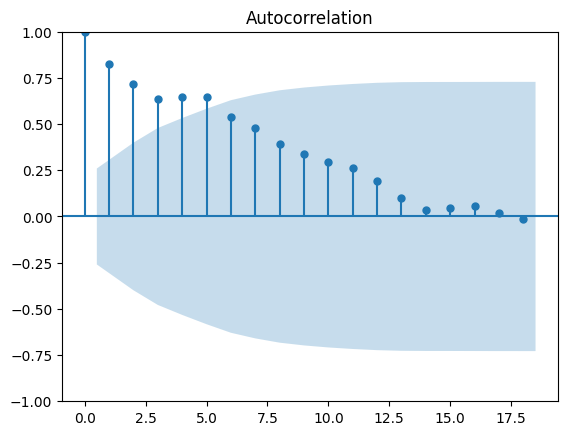

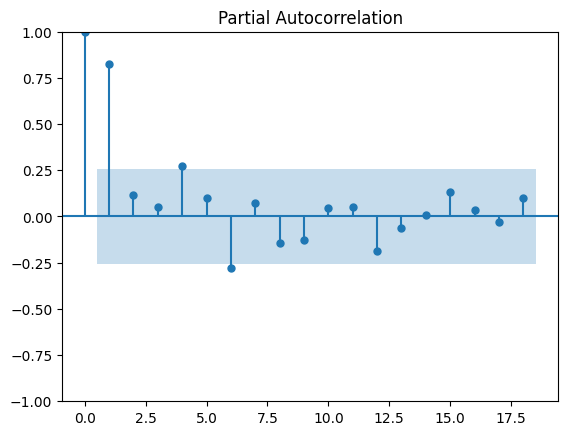

In [24]:
plot_acf(smoke_df['Smoke_Estimate'])
plot_pacf(smoke_df['Smoke_Estimate'])
plt.show()


In-sample MAE: 1.1688216777238112
In-sample RMSE: 1.9439867408702418
In-sample MAPE: 241.49774000539637%


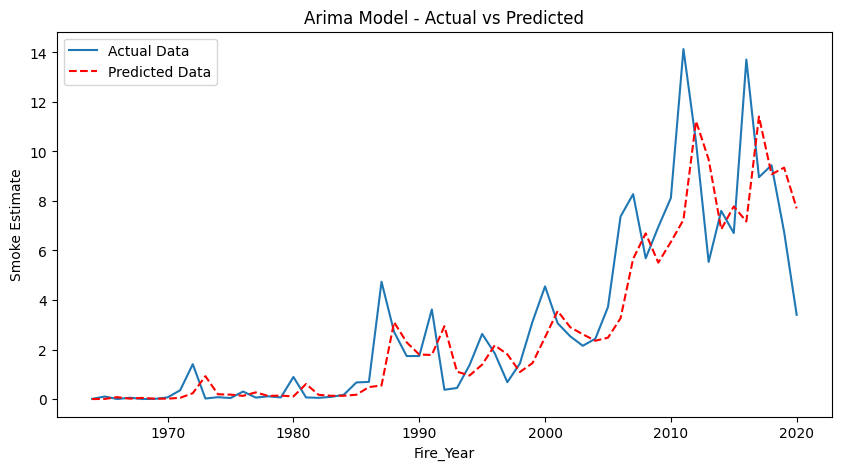

In [25]:
# Fit ARIMA model
smoke_df['Fire_Year'] = pd.to_datetime(smoke_df['Fire_Year'], format='%Y')
smoke_df.set_index('Fire_Year', inplace=True)

model = ARIMA(smoke_df['Smoke_Estimate'], order=(1, 1, 1)) 
model_fit = model.fit()

# Print model summary
#print(model_fit.summary())

# Forecast on the entire dataset (in-sample prediction)
predicted_data = model_fit.predict(start=smoke_df.index[0], end=smoke_df.index[-1], typ='levels')


# Calculate performance metrics
mae = mean_absolute_error(smoke_df['Smoke_Estimate'], predicted_data)
rmse = np.sqrt(mean_squared_error(smoke_df['Smoke_Estimate'], predicted_data))
mape = np.mean(np.abs(smoke_df['Smoke_Estimate'] - predicted_data) / smoke_df['Smoke_Estimate']) * 100

print(f'In-sample MAE: {mae}')
print(f'In-sample RMSE: {rmse}')
print(f'In-sample MAPE: {mape}%')


# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(smoke_df.index, smoke_df['Smoke_Estimate'], label='Actual Data')
plt.plot(predicted_data.index, predicted_data, label='Predicted Data', color='red', linestyle='--')
plt.xlabel('Fire_Year')
plt.ylabel('Smoke Estimate')
plt.title('Arima Model - Actual vs Predicted')
plt.legend()
plt.show()


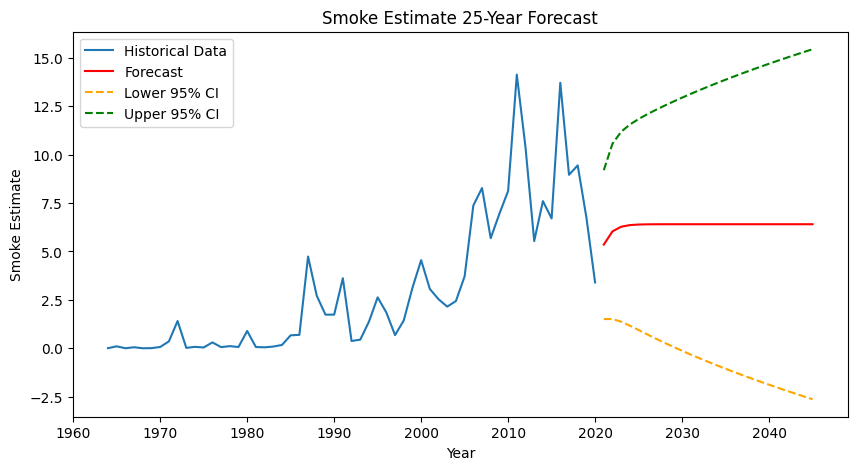

2021-01-01    5.354278
2022-01-01    6.038041
2023-01-01    6.277498
2024-01-01    6.361357
2025-01-01    6.390725
2026-01-01    6.401010
2027-01-01    6.404612
2028-01-01    6.405873
2029-01-01    6.406315
2030-01-01    6.406470
2031-01-01    6.406524
2032-01-01    6.406543
2033-01-01    6.406549
2034-01-01    6.406552
2035-01-01    6.406552
2036-01-01    6.406553
2037-01-01    6.406553
2038-01-01    6.406553
2039-01-01    6.406553
2040-01-01    6.406553
2041-01-01    6.406553
2042-01-01    6.406553
2043-01-01    6.406553
2044-01-01    6.406553
2045-01-01    6.406553
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [35]:
# Forecast the next 25 years with a 95% confidence interval
forecast = model_fit.get_forecast(steps=25)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plotting the results without filling the CI area
plt.figure(figsize=(10, 5))
plt.plot(smoke_df.index, smoke_df['Smoke_Estimate'], label='Historical Data')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')

# Plot the confidence interval edges as lines
plt.plot(forecast_mean.index, forecast_ci.iloc[:, 0], color='orange', linestyle='--', label='Lower 95% CI')
plt.plot(forecast_mean.index, forecast_ci.iloc[:, 1], color='green', linestyle='--', label='Upper 95% CI')

plt.xlabel('Year')
plt.ylabel('Smoke Estimate')
plt.title('Smoke Estimate 25-Year Forecast')
plt.legend()
plt.show()

forecast_mean